In [2]:
import json
from collections import defaultdict
import pandas as pd

def get_response(fname):
    try:
        with open(fname, 'r') as f:
            data = f.read()
        response = json.loads(data)
        surv_resp = defaultdict(dict)
        pass_resp = defaultdict(str)
        time_resp = defaultdict(str)
        dids = ''

        for k, v in response.items():
            if 'response' in k:
                temp = k.split("_")
                pid = temp[0].strip('p')
                v = json.loads(v)
                surv_resp[pid].update(v)
            elif 'time' in k:
                temp = k.split("_")
                pid = temp[0]
                time_resp[pid] = float(v)
            elif 'password' in k:
                pass_resp[k] = v
            elif 'did' in k:
                did = v

        return (pass_resp, time_resp, surv_resp, did)
    except:
        pass

In [3]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [4]:
cat_map = {
    'Perspicuity': [1, 2, 3, 4],
    'Aesthetics': [5, 7, 8, 9],
    'Usefulness': [10, 11, 12, 13],
    'Clarity': [14, 15, 16, 17],
    'Creative': [28],
    'Engaging': [6, 15, 29]
    # 'Novel': [],
    # 'Attractive': [],
    # 'Easy to understand': [],
    # 'Informative': [],
    # 'Well Organized ': [],
    # 'To the Point': []
}

In [5]:
questions = {}
for page_id in [3, 7, 8, 12, 14]:
    page_name = page_map.get(str(page_id))
    question_file = f'{page_name}.json'

    with open(f'../questions/{question_file}', 'r') as f:
        questions[str(page_id)] = json.loads(f.read())

def get_qdetails(pid, qsid):
    pid = str(pid)
    qid, sid = qsid.split('-')
    if not questions.get(pid): return "Page ID not found."
    ret_text = ""
    for question in questions.get(pid):
        if question.get('qid') == int(qid):
            ret_text += question.get('text')
            for subquestion in question.get('subquestions'):
                if subquestion.get('sid') == int(sid):
                    ret_text += '\n' + str(subquestion)
    return ret_text

In [6]:
import os
fpath = '../responses'
password_response = []
time_response = []
survey_response = []
dids = []
for i, fname in enumerate(os.listdir(fpath)):
    if fname.endswith('.json'):
        pss, tim, sur, did = get_response(os.path.join(fpath, fname))
        sur.pop('5', None)
        sur.pop('9', None)
        sur.pop('13', None)
        password_response.append(pss)
        time_response.append(tim)
        survey_response.append(sur)
        dids.append(did)


In [7]:
import pandas as pd
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password2,password2_recall1,password2_recall2
0,pSVNLb85CUNPCwX,NaN,NaN
1,CozyBi11$,NaN,NaN
2,PRO333TECT,NaN,NaN
3,ALB*1988,NaN,NaN
4,qwerty098!@#123cow,NaN,NaN
...,...,...,...
87,Reese@54687*,NaN,NaN
88,ANTH*1999,NaN,NaN
89,Ws14827!Ld,NaN,NaN
90,8778831142,NaN,NaN


In [8]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,fcog,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.839,13.774,12.693,19.878,67.504,134.684,15.391,25.888,13.926,19.650,9.519,48.709,6.457583
1,5.174,11.211,6.987,15.680,36.149,110.712,12.244,35.100,16.638,24.316,8.088,28.816,5.185250
2,1.664,22.872,3.551,5.522,43.416,115.263,2.750,48.463,7.047,17.072,15.119,96.297,6.317267
3,2.488,4.870,3.625,644.368,20.175,52.286,3.075,6.243,6.703,12.893,5.351,25.363,13.124000
4,3.674,12.131,8.609,16.923,44.405,275.207,16.491,26.397,17.456,21.576,9.910,40.114,8.214883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5.006,85.158,8.670,29.894,45.317,236.717,24.731,72.371,14.635,37.939,8.667,169.586,12.311517
88,2.662,5.978,3.522,9.766,25.314,99.386,3.114,6.511,10.750,10.841,5.196,24.315,3.455917
89,9.237,27.703,7.435,29.832,65.615,189.192,36.536,75.067,13.396,31.367,27.890,45.550,9.313667
90,2.605,7.952,3.379,3.788,88.160,50.973,3.361,67.880,10.194,10.457,9.445,33.149,4.855717


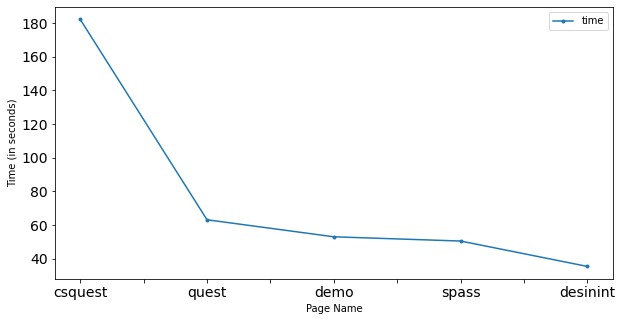

In [9]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [10]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,8,12,3,7,14
0,"{'5-1': '1', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '7', '2-1': '1', '3-1': '7', '3-2': '1...","{'1-1': '6', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-16': '2', '1-11': '5', '1-12': '3', '1-17'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'..."
1,"{'5-1': '5', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '3...","{'1-1': '7', '1-2': '1', '1-3': '3', '1-4': '5'}","{'1-11': '7', '1-15': '6', '1-16': '1', '1-13'...","{'1-1': 'Man', '2-1': '18-24 years old', '3-1'..."
2,"{'5-1': '6', '6-1': '1', '7-1': '4', '8-1': ['...","{'1-1': '6', '2-1': '7', '3-1': '6', '3-2': '1...","{'1-1': '4', '1-2': '6', '1-3': '5', '1-4': '1'}","{'1-15': '6', '1-13': '1', '1-14': '6', '1-16'...","{'1-1': 'Woman', '2-1': '30-34 years old', '3-..."
3,"{'5-1': '5', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '6', '2-1': '5', '3-1': '6', '3-2': '5...","{'1-1': '5', '1-2': '7', '1-3': '6', '1-4': '6'}","{'1-12': '5', '1-11': '7', '1-17': '7', '1-16'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'..."
4,"{'1-7': '6', '1-1': '2', '1-6': '2', '1-3': '2...","{'1-1': '6', '2-1': '4', '3-1': '3', '3-2': '1...","{'1-1': '7', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-10': '6', '1-5': '5', '1-7': '3', '1-2': '...","{'1-1': 'Non-Binary', '2-1': '25-29 years old'..."
...,...,...,...,...,...
87,"{'5-1': '7', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '7', '2-1': '6', '3-1': '4', '3-2': '2...","{'1-1': '4', '1-2': '5', '1-3': '6', '1-4': '3'}","{'1-17': '4', '1-12': '2', '1-15': '5', '1-13'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'..."
88,"{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '5', '2-1': '6', '3-1': '4', '3-2': '6...","{'1-1': '5', '1-2': '6', '1-3': '4', '1-4': '5'}","{'1-14': '4', '1-11': '6', '1-13': '7', '1-16'...","{'1-1': 'Man', '2-1': '18-24 years old', '3-1'..."
89,"{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '6', '2-1': '7', '3-1': '7', '3-2': '1...","{'1-1': '5', '1-2': '6', '1-3': '6', '1-4': '1'}","{'1-13': '3', '1-11': '6', '1-16': '3', '1-17'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-..."
90,"{'5-1': '6', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '6', '2-1': '5', '3-1': '6', '3-2': '5...","{'1-1': '6', '1-2': '5', '1-3': '6', '1-4': '5'}","{'1-13': '5', '1-12': '6', '1-17': '5', '1-16'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'..."


In [11]:
survey_response_df['did'] = dids
survey_response_df.groupby(by='did').count()

,8,12,3,7,14
did,,,,,
1,2,2,2,2,2
2,1,1,1,1,1
3,28,28,28,28,28
4,32,32,32,32,32
5,29,29,29,29,29


### Attention Check

In [12]:
attention = {
   '7': {
      '1-6' : 7
   },
   '8': {
      '2-1' : 6,
      '6-1' : 1
   },
   '12': {
      '4-1': 2
   }
}

In [13]:
for pid, sub in attention.items():
    for qsid, val in sub.items():
        print(get_qdetails(pid, qsid))


{'sid': 6, 'type': 'likert', 'title': '', 'elements': {'low': 'select rightmost circle', 'high': 'select rightmost circle'}}
Please select the sixth option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': 'sixth option', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the first option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': 'first option', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the second option which tells us you are paying attention: 
{'sid': 1, 'type': 'likert', 'title': 'second option', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}


In [14]:
attentive_participants = defaultdict(lambda: True)
for pid, sub in attention.items():
    # print(pid)
    for qsid, e in sub.items():
        # print(qsid)
        for pn, a in enumerate(survey_response_df[pid].apply(lambda x: x.get(qsid))):
            # print(pn, e, a, str(e)==str(a))
            attentive_participants[str(pn)] = attentive_participants[str(pn)] and (str(e)==str(a))

In [15]:
attentive = pd.DataFrame(attentive_participants, index=[0]).transpose()
attentive.columns = ['attentive']
attentive.value_counts()

attentive
True         73
False        19
dtype: int64

In [16]:
survey_response_df['attention'] = attentive['attentive'].values
survey_response_df = survey_response_df.loc[survey_response_df['attention'] == True]
survey_response_df

,8,12,3,7,14,did,attention
0,"{'5-1': '1', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '7', '2-1': '1', '3-1': '7', '3-2': '1...","{'1-1': '6', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-16': '2', '1-11': '5', '1-12': '3', '1-17'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'...",3,True
1,"{'5-1': '5', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '3...","{'1-1': '7', '1-2': '1', '1-3': '3', '1-4': '5'}","{'1-11': '7', '1-15': '6', '1-16': '1', '1-13'...","{'1-1': 'Man', '2-1': '18-24 years old', '3-1'...",5,True
2,"{'5-1': '6', '6-1': '1', '7-1': '4', '8-1': ['...","{'1-1': '6', '2-1': '7', '3-1': '6', '3-2': '1...","{'1-1': '4', '1-2': '6', '1-3': '5', '1-4': '1'}","{'1-15': '6', '1-13': '1', '1-14': '6', '1-16'...","{'1-1': 'Woman', '2-1': '30-34 years old', '3-...",5,True
3,"{'5-1': '5', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '6', '2-1': '5', '3-1': '6', '3-2': '5...","{'1-1': '5', '1-2': '7', '1-3': '6', '1-4': '6'}","{'1-12': '5', '1-11': '7', '1-17': '7', '1-16'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'...",3,True
4,"{'1-7': '6', '1-1': '2', '1-6': '2', '1-3': '2...","{'1-1': '6', '2-1': '4', '3-1': '3', '3-2': '1...","{'1-1': '7', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-10': '6', '1-5': '5', '1-7': '3', '1-2': '...","{'1-1': 'Non-Binary', '2-1': '25-29 years old'...",3,True
...,...,...,...,...,...,...,...
85,"{'5-1': '3', '6-1': '1', '7-1': '3', '8-1': ['...","{'1-1': '6', '2-1': '6', '3-1': '4', '3-2': '2...","{'1-1': '5', '1-2': '7', '1-3': '6', '1-4': '1'}","{'1-15': '4', '1-11': '3', '1-12': '5', '1-14'...","{'1-1': 'Man', '2-1': '45-49 years old', '3-1'...",5,True
86,"{'5-1': '7', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '7', '2-1': '7', '3-1': '3', '3-2': '1...","{'1-1': '2', '1-2': '7', '1-3': '6', '1-4': '2'}","{'1-15': '6', '1-11': '6', '1-12': '2', '1-16'...","{'1-1': 'Man', '2-1': '50-54 years old', '3-1'...",4,True
87,"{'5-1': '7', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '7', '2-1': '6', '3-1': '4', '3-2': '2...","{'1-1': '4', '1-2': '5', '1-3': '6', '1-4': '3'}","{'1-17': '4', '1-12': '2', '1-15': '5', '1-13'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'...",3,True
89,"{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '6', '2-1': '7', '3-1': '7', '3-2': '1...","{'1-1': '5', '1-2': '6', '1-3': '6', '1-4': '1'}","{'1-13': '3', '1-11': '6', '1-16': '3', '1-17'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-...",5,True


In [17]:
survey_response_df.groupby(by='did').count()

,8,12,3,7,14,attention
did,,,,,,
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,22,22,22,22,22,22
4,23,23,23,23,23,23
5,26,26,26,26,26,26


### First Password Survey Analysis

In [18]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [19]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,89,91
1-1,6,7,4,5,7,3,5,3,1,7,...,6,5,4,6,7,5,2,4,5,4
1-2,7,1,6,7,7,7,7,7,7,6,...,3,6,7,6,4,7,7,5,6,6
1-3,7,3,5,6,7,5,7,7,7,7,...,5,6,5,6,3,6,6,6,6,6
1-4,1,5,1,6,1,1,3,1,1,6,...,3,3,2,6,1,1,2,3,1,2


In [20]:
# fpasssurvey
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,89,91,median
"I do not change my passwords, unless I have to.",6,7,4,5,7,3,5,3,1,7,...,5,4,6,7,5,2,4,5,4,5.0
I use different passwords for different online accounts that I have.,7,1,6,7,7,7,7,7,7,6,...,6,7,6,4,7,7,5,6,6,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",7,3,5,6,7,5,7,7,7,7,...,6,5,6,3,6,6,6,6,6,5.0
I do not include special characters in my password if it’s not required.,1,5,1,6,1,1,3,1,1,6,...,3,2,6,1,1,2,3,1,2,3.0


In [21]:
get_qdetails('7', '1-1')

"\n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'not understandable', 'high': 'understandable'}}"

### Quest Analysis

In [22]:
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,89,91,mean
1-16,2,1,1,7,1,1,1,3,3,3,...,2,2,2,4,5,2,3,3,3,2.547945
1-11,5,7,7,7,2,7,7,5,5,5,...,5,7,6,3,3,6,5,6,4,5.438356
1-12,3,2,2,5,6,1,1,3,2,2,...,3,1,2,5,5,2,2,1,3,2.671233
1-17,6,7,7,7,7,7,7,5,5,4,...,5,6,6,4,3,6,4,5,5,5.684932
1-15,6,6,6,6,7,7,7,5,5,2,...,5,6,6,4,4,6,5,5,5,5.657534
1-14,6,7,6,5,7,7,7,4,5,5,...,6,7,7,4,4,6,6,5,5,5.493151
1-13,6,3,1,4,6,4,2,5,4,3,...,5,2,2,6,6,2,5,3,4,3.315068
1-8,1,5,6,5,2,6,6,3,5,5,...,4,7,6,5,3,6,6,6,5,5.082192
1-6,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7.000000
1-9,1,4,7,5,3,5,7,4,4,3,...,4,7,6,3,3,6,3,2,5,4.739726


In [23]:
# quest
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,89,91,mean
ordered,6.0,7.0,7.0,1.0,7.0,7.0,7.0,5.0,5.0,5.0,...,6.0,6.0,6.0,4.0,3.0,6.0,5.0,5.0,5.0,5.452055
helpful,5.0,7.0,7.0,7.0,2.0,7.0,7.0,5.0,5.0,5.0,...,5.0,7.0,6.0,3.0,3.0,6.0,5.0,6.0,4.0,5.438356
beneficial,5.0,6.0,6.0,3.0,2.0,7.0,7.0,5.0,6.0,6.0,...,5.0,7.0,6.0,3.0,3.0,6.0,6.0,7.0,5.0,5.328767
organized,6.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,5.0,4.0,...,5.0,6.0,6.0,4.0,3.0,6.0,4.0,5.0,5.0,5.684932
structured,6.0,6.0,6.0,6.0,7.0,7.0,7.0,5.0,5.0,2.0,...,5.0,6.0,6.0,4.0,4.0,6.0,5.0,5.0,5.0,5.657534
well grouped,6.0,7.0,6.0,5.0,7.0,7.0,7.0,4.0,5.0,5.0,...,6.0,7.0,7.0,4.0,4.0,6.0,6.0,5.0,5.0,5.493151
rewarding,2.0,5.0,7.0,4.0,2.0,4.0,6.0,3.0,4.0,5.0,...,3.0,6.0,6.0,2.0,2.0,6.0,3.0,5.0,4.0,4.684932
appealing,1.0,5.0,6.0,5.0,2.0,6.0,6.0,3.0,5.0,5.0,...,4.0,7.0,6.0,5.0,3.0,6.0,6.0,6.0,5.0,5.082192
select rightmost circle,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.000000
pleasant,1.0,4.0,7.0,5.0,3.0,5.0,7.0,4.0,4.0,3.0,...,4.0,7.0,6.0,3.0,3.0,6.0,3.0,2.0,5.0,4.739726


In [24]:
pd.DataFrame(survey_response_df['8'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,89,91
5-1,1,5,6,5,1,7,7,5,5,7,...,5,5,5,6,3,3,7,7,6,5
6-1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7-1,5,5,4,6,5,7,4,5,5,7,...,5,5,6,6,2,3,6,6,6,5
8-1,[None of the above],"[Social Media, Email, Financial Websites, Cour...","[Social Media, Email]","[Social Media, Email]",[None of the above],"[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Gove...","[Social Media, Email]","[Social Media, E-commerce Websites, Government...",...,[Financial Websites],[None of the above],"[Social Media, Email]","[Social Media, Email, Financial Websites]","[Course Management Websites, e.g. Canvas, Blac...","[Financial Websites, E-commerce Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co...","[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Financial Websites, Gove..."
2-1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3-1,1,6,5,5,2,5,7,4,5,7,...,5,5,5,6,4,2,5,5,1,4
3-2,4,6,7,4,4,7,7,5,6,7,...,4,6,7,7,3,5,7,7,1,6
3-3,1,3,5,6,1,1,7,2,5,7,...,5,3,6,6,2,2,5,6,2,4
3-4,1,2,6,5,1,5,7,2,5,7,...,6,3,7,6,2,3,5,7,1,4
4-1,7,7,5,6,7,7,7,3,6,5,...,5,5,5,7,3,5,7,6,1,5


In [25]:
# csquest
qualindex = ['8-1', '10-1', '11-1']

# qualindex = ['8-1', '10-1']

csquest = pd.DataFrame(survey_response_df['8'].to_dict())
csquestqual = csquest.loc[qualindex]
display(csquestqual)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,89,91
8-1,[None of the above],"[Social Media, Email, Financial Websites, Cour...","[Social Media, Email]","[Social Media, Email]",[None of the above],"[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Gove...","[Social Media, Email]","[Social Media, E-commerce Websites, Government...",...,[Financial Websites],[None of the above],"[Social Media, Email]","[Social Media, Email, Financial Websites]","[Course Management Websites, e.g. Canvas, Blac...","[Financial Websites, E-commerce Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co...","[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Financial Websites, Gove..."
10-1,"I guess the last panel, which shows how easy i...",The possibility of it showing a threat by only...,THE LAST PART IS REALLT MOTIVATES TO MAKE A ST...,ALB*1988,"Mainly the child asking the dad what he did, s...",The part where it takes over the account and s...,The hacker can't hack that system while creati...,"The fear of my personal information (phone, lo...",I already create crazy passwords because I kno...,The last part of the design motivated me to cr...,...,i would most strong password to make with my b...,I think the last panel where you see the other...,I would put a strong password in case someone ...,2,The part where the coworkers start to blame Al...,"When I see ""Credit Card Info"" as one of the pi...",The part where the hacker sends out the virus ...,THE PASSWORDS CAN BE EASILY ACCESSBLE ONE TO A...,The hacker's screen saying attack successful a...,The second part motives me most to create a st...
11-1,NaN,NaN,NaN,NaN,NaN,NaN,The dartboard represents the difficulty level ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
normqsid = []

csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,89,91,mean,median
portrayal of hacker stimulates,1.0,5.0,6.0,5.0,1.0,7.0,7.0,5.0,5.0,7.0,...,5.0,6.0,3.0,3.0,7.0,7.0,6.0,5.0,5.136986,5.000000
portrayal of victim encourages,5.0,5.0,4.0,6.0,5.0,7.0,4.0,5.0,5.0,7.0,...,6.0,6.0,2.0,3.0,6.0,6.0,6.0,5.0,5.164384,5.000000
Makes me worried,1.0,6.0,5.0,5.0,2.0,5.0,7.0,4.0,5.0,7.0,...,5.0,6.0,4.0,2.0,5.0,5.0,1.0,4.0,4.493151,5.000000
Encourages me to create a strong password,4.0,6.0,7.0,4.0,4.0,7.0,7.0,5.0,6.0,7.0,...,7.0,7.0,3.0,5.0,7.0,7.0,1.0,6.0,5.410959,6.000000
Makes me feel emotionally connected to the presented scenario,1.0,3.0,5.0,6.0,1.0,1.0,7.0,2.0,5.0,7.0,...,6.0,6.0,2.0,2.0,5.0,6.0,2.0,4.0,4.712329,5.000000
Makes me feel personally connected to the presented scenario,1.0,2.0,6.0,5.0,1.0,5.0,7.0,2.0,5.0,7.0,...,7.0,6.0,2.0,3.0,5.0,7.0,1.0,4.0,4.630137,5.000000
easy to follow,7.0,7.0,5.0,6.0,7.0,7.0,7.0,3.0,6.0,5.0,...,5.0,7.0,3.0,5.0,7.0,6.0,1.0,5.0,5.712329,6.000000
Novel,1.0,1.0,4.0,6.0,2.0,4.0,6.0,5.0,4.0,4.0,...,3.0,6.0,4.0,3.0,6.0,5.0,4.0,6.0,4.575342,5.000000
Informative,5.0,6.0,6.0,6.0,2.0,7.0,7.0,5.0,5.0,6.0,...,7.0,5.0,3.0,2.0,7.0,7.0,3.0,5.0,5.356164,6.000000
Well Organized,2.0,5.0,7.0,3.0,5.0,4.0,6.0,3.0,4.0,2.0,...,7.0,6.0,2.0,3.0,3.0,3.0,5.0,6.0,4.547945,5.000000


In [27]:
#spasssurvey
pd.DataFrame(survey_response_df['12'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,89,91
1-1,7,6,6,6,6,7,7,4,5,7,...,6,4,7,7,6,6,7,7,6,6
2-1,1,6,7,5,4,7,7,4,5,7,...,5,5,6,6,7,6,7,6,7,6
3-1,7,2,6,6,3,1,1,5,5,6,...,5,2,7,7,1,4,3,4,7,5
3-2,1,3,1,5,1,1,1,3,1,3,...,2,5,6,6,3,2,1,2,1,2
3-3,1,1,1,7,1,1,2,1,1,3,...,3,2,6,6,1,1,1,1,1,2
3-4,4,6,6,6,4,4,6,1,1,7,...,6,1,5,6,4,3,4,6,5,3
4-1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [28]:
# spasssurvey
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)
spass

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,89,91,median
strength of password,7,6,6,6,6,7,7,4,5,7,...,4,7,7,6,6,7,7,6,6,6.0
motivated after going through design,1,6,7,5,4,7,7,4,5,7,...,5,6,6,7,6,7,6,7,6,6.0
Hard to remember,7,2,6,6,3,1,1,5,5,6,...,2,7,7,1,4,3,4,7,5,4.0
Can be easily guessed by a hacker,1,3,1,5,1,1,1,3,1,3,...,5,6,6,3,2,1,2,1,2,2.0
Can be easily guessed by my close friends or family members,1,1,1,7,1,1,2,1,1,3,...,2,6,6,1,1,1,1,1,2,2.0
Stronger than the passwords I usually use,4,6,6,6,4,4,6,1,1,7,...,1,5,6,4,3,4,6,5,3,5.0
second option,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2.0


In [29]:
# demo
pd.DataFrame(survey_response_df['14'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,89,91
1-1,Man,Man,Woman,Man,Non-Binary,Woman,Man,Man,Man,Woman,...,Man,Man,Woman,Man,Woman,Man,Man,Man,Woman,Woman
2-1,35-39 years old,18-24 years old,30-34 years old,30-34 years old,25-29 years old,45-49 years old,35-39 years old,35-39 years old,35-39 years old,25-29 years old,...,35-39 years old,30-34 years old,18-24 years old,50-54 years old,25-29 years old,45-49 years old,50-54 years old,35-39 years old,50-54 years old,55-59 years old
3-1,[Hispanic or Latino],[White],[White],[White],[Asian],[White],[White],[White],[White],"[White, Hispanic or Latino]",...,[White],[Hispanic or Latino],[White],[White],[White],[White],[Hispanic or Latino],[White],[Asian],[White]
4-1,High School Graduate,Four-year College Degree,Four-year College Degree,Graduate degree (MS/Doctorate),Four-year College Degree,High School Graduate,Four-year College Degree,Graduate degree (MS/Doctorate),Two-year College Degree,Four-year College Degree,...,Four-year College Degree,Four-year College Degree,Four-year College Degree,Graduate degree (MS/Doctorate),Four-year College Degree,Four-year College Degree,Graduate degree (MS/Doctorate),Four-year College Degree,Four-year College Degree,High School Graduate
5-1,"Medicine, Nursing, and Health Sciences","Mathematics, and Natural Sciences (Physics, Ch...",Other areas of Engineering,"Computer Science/Engineering, and Information ...","Computer Science/Engineering, and Information ...",N/A,"Computer Science/Engineering, and Information ...","Journalism, Media and Communication","Computer Science/Engineering, and Information ...","Computer Science/Engineering, and Information ...",...,"Medicine, Nursing, and Health Sciences","Computer Science/Engineering, and Information ...","Law, and Public Administration","Computer Science/Engineering, and Information ...",Business,"Mathematics, and Natural Sciences (Physics, Ch...","Economics, Humanities and Social Sciences","Computer Science/Engineering, and Information ...",Business,I prefer not to answer
6-1,Business or industry,Unemployed,Non-profit organization,Business or industry,Business or industry,Business or industry,Business or industry,Educational institution,Business or industry,Business or industry,...,Business or industry,Business or industry,Business or industry,Business or industry,Business or industry,Business or industry,Business or industry,Business or industry,Business or industry,I prefer not to answer
7-1,Self-taught,No experience,Pursuing or completed a degree,Pursuing or completed a degree,Pursuing or completed a degree,Self-taught,Hold or held a work position,Hold or held a work position,Self-taught,Pursuing or completed a degree,...,Pursuing or completed a degree,Hold or held a work position,Formal training,Formal training,Self-taught,Self-taught,Self-taught,Pursuing or completed a degree,No experience,No experience
8-1,No experience,No experience,Formal training,Pursuing or completed a degree,I prefer not to answer,Training from Work,Formal training,Hold or held a work position,Self-taught,Hold or held a work position,...,Formal training,No experience,Self-taught,Formal training,Self-taught,No experience,Self-taught,Pursuing or completed a degree,No experience,No experience
